# **Loading the Data and Preprocessing**

In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Project-Responses-Sheet1_1.csv')
df.head()

,کراچی میں اومی کرون ویرینٹ کے کیس سامنے آنے پر گلشن اقبال بلاک 7 میں اسمارٹ لاک ڈاؤن نافذ کردیا گیا۔ اچھا اقدام
0,وفاقی وزیر اسد عمر کا کہنا ہے کہ پاکستان میں ک...
1,وفاقی ماہرین صحت کا کہنا ہے کہ پاکستان میں کور...
2,وفاقی وزیر برائے منصوبہ بندی و این سی او سی کے...
3,ترجمان سندھ حکومت اور ایڈمنسٹریٹر کراچی مرتضیٰ...
4,سندھ بھر میں عالمی وباء کورونا وائرس سے بچاؤ ...


In [ ]:
df = pd.read_csv("/content/Project-Responses-Sheet1_1.csv", sep='   ',names = ["Headlines", "Tag"])

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df.head()

,Headlines,Tag
0,"""کراچی میں اومی کرون ویرینٹ کے کیس سامنے آنے پ...","اچھا اقدام"""
1,"""وفاقی وزیر اسد عمر کا کہنا ہے کہ پاکستان میں ...","ٹھیک اقدام"""
2,"""وفاقی ماہرین صحت کا کہنا ہے کہ پاکستان میں کو...","ٹھیک اقدام"""
3,"""وفاقی وزیر برائے منصوبہ بندی و این سی او سی ک...","بُرا اقدام"""
4,"""ترجمان سندھ حکومت اور ایڈمنسٹریٹر کراچی مرتضی...","ٹھیک اقدام"""


In [ ]:
# Associate Category names with numerical index and save it in new column category_id
df['category_id'] = df['Tag'].factorize()[0]

#View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]


0    0
1    1
2    1
3    2
4    1
5    0
6    0
7    1
8    0
9    1
Name: category_id, dtype: int64

In [ ]:
category_id_df = df[['Tag', 'category_id']].drop_duplicates().sort_values('category_id')

In [ ]:
category_id_df

,Tag,category_id
0,"اچھا اقدام""",0
1,"ٹھیک اقدام""",1
3,"بُرا اقدام""",2
34,"برا اقدام""",3
64,"اچھا اقدام""",4


In [ ]:
category_to_id = dict(category_id_df.values)

id_to_category = dict(category_id_df[['category_id','Tag']].values)


In [ ]:
id_to_category

{0: 'اچھا اقدام"',
 1: 'ٹھیک اقدام"',
 2: 'بُرا اقدام"',
 3: 'برا اقدام"',
 4: ' اچھا اقدام"'}

In [ ]:
df.sample(5, random_state=0)

,Headlines,Tag,category_id
18,"""ترجمان وزارت صحت کا کہنا ہے کہ عازمین حج کی س...","اچھا اقدام""",0
170,"""ترجمان سندھ حکومت مرتضیٰ وہاب نے کہا ہے کہ کر...","ٹھیک اقدام""",1
107,"""ملتان میں مسافر بسوں اور وینز میں بغیر کورونا...","اچھا اقدام""",0
98,"""نیشنل کمانڈ اینڈ آپریشن سینٹر (این سی او سی)...","ٹھیک اقدام""",1
177,"""نیشنل کمانڈ اینڈ آپریشنز سینٹر (این سی او سی...","ٹھیک اقدام""",1


In [ ]:
df.groupby('Tag').category_id.count()

Tag
 اچھا اقدام"      1
اچھا اقدام"     112
برا اقدام"       19
بُرا اقدام"       5
ٹھیک اقدام"      63
Name: category_id, dtype: int64

<Figure size 576x432 with 0 Axes>

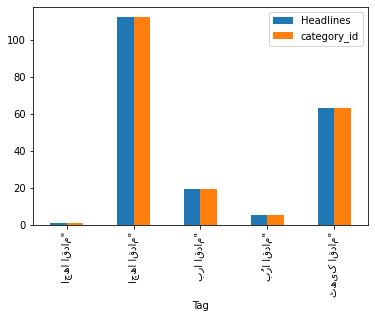

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Tag').count().plot.bar(ylim=0)
plt.show()

# **LSTM Model**

In [ ]:
import numpy as np
import pandas as pd

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Flatten, Dense, Embedding

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [ ]:
data = pd.read_csv('/content/urdu-sentiment-corpus-v1-2_1.csv')
data = [x.split('   ')[1].strip() for x in data]
data[:10]

['میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب کوٹ لکھپت والی اتفاق فیکٹری میں نہیں بنتا۔ایٹم بم کہوٹہ کی ایٹمی۔۔۔']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data)
vocab_size = len(tokenizer.word_index) + 1
vocab_size

20

In [ ]:
train_data = tokenizer.texts_to_sequences(data)
training_examples = []
labels = []

for e in train_data:
    for i in range(1, len(e)):
        training_examples.append(e[:i])
        labels.append(e[i])
        
max_len = max([len(x) for x in training_examples])
X = pad_sequences(training_examples, maxlen=max_len)
X

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  1,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  4,  2,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  4,  2,  3,  5],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         4,  2,  3,  5,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,
         2,  3,  5,  6,  7],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  2,
         3,  5,  6,  7,  8],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  2,  3,
         5,  6,  7,  8,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  4,  2,  3,  5,
         6,  7,  8,

In [ ]:
Y = to_categorical(labels, num_classes=vocab_size)
Y

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.

In [ ]:
model = Sequential([
    Embedding(vocab_size, 300),
    Bidirectional(LSTM(20)),
    Flatten(),
    Dense(vocab_size, activation='softmax')
])

optim = Adam(learning_rate=0.01)
loss = CategoricalCrossentropy()
model.compile(optimizer=optim, loss=loss, metrics=['accuracy'])

Epoch 1/30
1/1 [==============================] - 4s 4s/step - loss: 3.0017 - accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 32ms/step - loss: 2.9009 - accuracy: 0.1429
Epoch 3/30
1/1 [==============================] - 0s 30ms/step - loss: 2.7793 - accuracy: 0.1429
Epoch 4/30
1/1 [==============================] - 0s 27ms/step - loss: 2.6206 - accuracy: 0.1429
Epoch 5/30
1/1 [==============================] - 0s 41ms/step - loss: 2.4378 - accuracy: 0.1905
Epoch 6/30
1/1 [==============================] - 0s 32ms/step - loss: 2.2414 - accuracy: 0.2381
Epoch 7/30
1/1 [==============================] - 0s 33ms/step - loss: 2.0646 - accuracy: 0.3333
Epoch 8/30
1/1 [==============================] - 0s 28ms/step - loss: 1.8888 - accuracy: 0.6190
Epoch 9/30
1/1 [==============================] - 0s 30ms/step - loss: 1.7323 - accuracy: 0.6190
Epoch 10/30
1/1 [==============================] - 0s 26ms/step - loss: 1.5685 - accuracy: 0.7143
Epoch 11/30
1/1 [==========

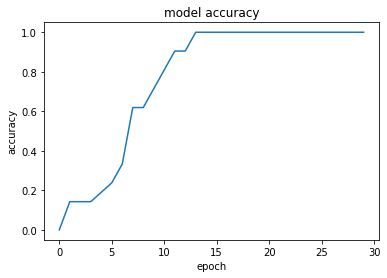

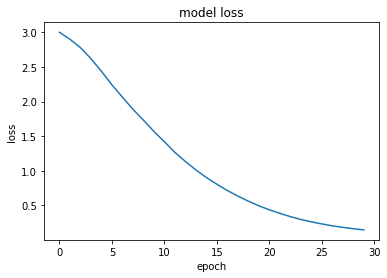

In [ ]:
BS = 32
EPOCHS = 30

history = model.fit(X, Y, batch_size=BS, epochs=EPOCHS)
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 300)         6000      
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               51360     
 nal)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
Total params: 58,180
Trainable params: 58,180
Non-trainable params: 0
_________________________________________________________________
